<a href="https://colab.research.google.com/github/Lipun101/netflix-content-classification/blob/main/Netflix_Data_Analysis_and_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Netflix Data Analysis and Classification**

**The dataset contains information about various Netflix titles and consists of 8,807 entries with the following columns:**

show_id: Unique identifier for each show.\
type: Type of the show (e.g., Movie, TV Show).\
title: Title of the show.\
director: Director(s) of the show.\
cast: Cast members of the show.\
country: Country where the show was produced.\
date_added: Date when the show was added to Netflix.\
release_year: Year when the show was released.\
rating: Rating of the show (e.g., PG-13, TV-MA).\
duration: Duration of the show (e.g., number of seasons for TV Shows, minutes for Movies).\
listed_in: Categories/genres the show is listed under.\
description: Description of the show.

In [ ]:
# Importing the dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [ ]:
# Reading the dataset
data =  pd.read_csv("/content/drive/MyDrive/netflix_titles.csv")
data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [ ]:
data1 = pd.read_csv("/content/drive/MyDrive/netflix_titles.csv")


In [ ]:
data.shape

(8807, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# **Data Cleaning**

In [ ]:
# Cleaning up the Rating column

default_rating = 'Not specified'
data['rating'] = data['rating'].fillna(default_rating)

replacements = {
    '66 min': 'Mature Audience',
    '74 min': 'Mature Audience',
    '84 min': 'Mature Audience',
    'TV-MA': 'Mature Audience',
    'TV-14': 'Teens 14+',
    'TV-PG': 'Parental Guidance',
    'TV-G': 'General Audience',
    'TV-Y': 'All Children',
    'TV-Y7': 'Older Children',
    'G': 'General Audience',
    'PG': 'Parental Guidance',
    'PG-13': 'Parents Strongly Cautioned',
    'R': 'Restricted',
    'NC-17': 'Adults Only',
    'UR': 'Unrated',
    'NR' : 'Not Rated',
    'TV-Y7-FV' : 'fantasy violence'
}

In [ ]:
# Filling up the null values in the country column

default_country = 'Not Specified'
data['country'] = data['country'].fillna(default_country)

# **Exploratory Data Analysis**

**What type of content is available in Top ten countries?**

type            Movie  TV Show
country                       
United States    2058      760
India             893       79
Not Specified     440      391
United Kingdom    206      213
Japan              76      169
South Korea        41      158
Canada            122       59
Spain              97       48
France             75       49
Mexico             70       40


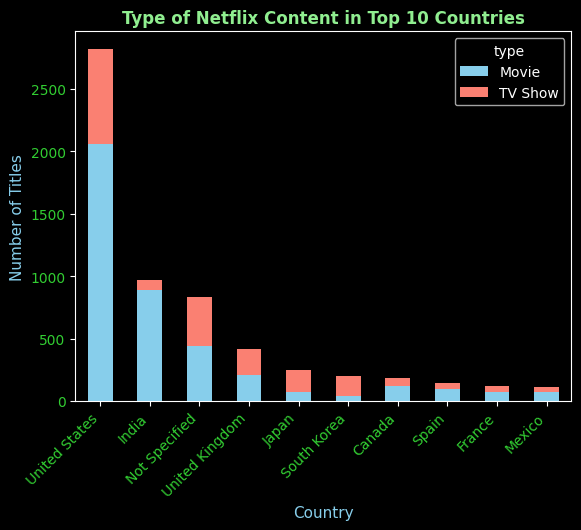

In [ ]:
# data.groupby('country')['type'].sum()

country_content = data.groupby(['country', 'type']).size().unstack(fill_value=0)
# print(country_content)
top_countries = country_content.sum(axis=1).sort_values(ascending=False).head(10)
# print(top_countries)
top_country_content = country_content.loc[top_countries.index]
print(top_country_content)

plt.style.use('dark_background')
top_country_content.plot(kind = 'bar', stacked=True, color = ['skyblue', 'salmon'])
plt.title('Type of Netflix Content in Top 10 Countries', color = 'lightgreen', weight = 'bold')
plt.xlabel('Country',color = 'skyblue', fontsize = 11)
plt.ylabel('Number of Titles', color = 'skyblue', fontsize = 11)
plt.xticks(rotation=45, ha='right', color = 'limegreen')
plt.yticks(color = 'limegreen')
plt.show()

United States, India and United Kingdom are leading with, 2,058 Movies 760 TV Shows, 893 Movies 79 TV Shows and 206 Movies 213 TV Shows respectively.

**If Netflix has been increasingly focusing on TV Shows rateher than Movies in recent years ?**

type          Movie  TV Show
release_year                
2000             33        4
2001             40        5
2002             44        7
2003             51       10
2004             55        9
2005             67       13
2006             82       14
2007             74       14
2008            113       23
2009            118       34
2010            154       40
2011            145       40
2012            173       64
2013            225       63
2014            264       88
2015            398      162
2016            658      244
2017            767      265
2018            767      380
2019            633      397
2020            517      436
2021            277      315


<Figure size 1200x800 with 0 Axes>

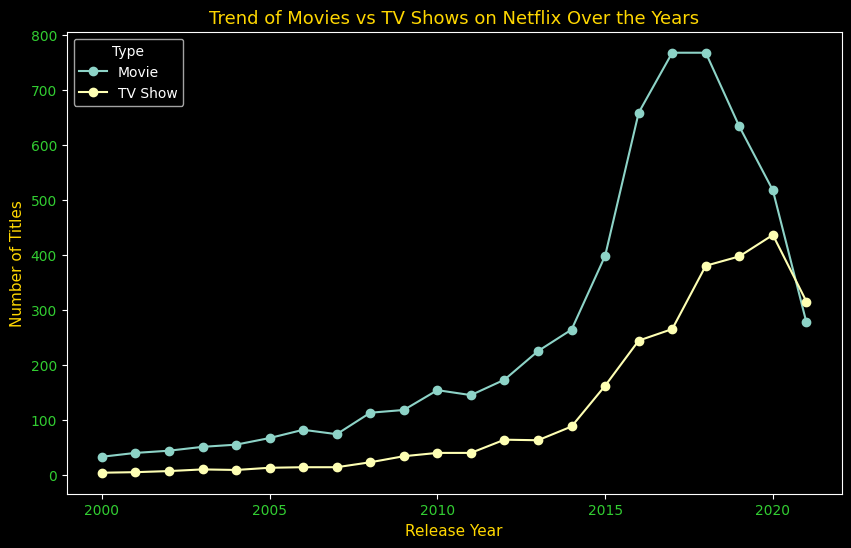

In [ ]:
filtered_data = data[(data['release_year'] >= 2000) & (data['release_year'] <= 2021)]
yearly_content = filtered_data.groupby(['release_year', 'type']).size().unstack(fill_value=0)
print(yearly_content)

plt.figure(figsize=(12, 8))
yearly_content.plot(kind='line', marker='o', figsize= (10,6))
plt.title('Trend of Movies vs TV Shows on Netflix Over the Years', color = 'gold', fontsize = 13)
plt.xlabel('Release Year', color = 'gold', fontsize = 11)
plt.ylabel('Number of Titles', color = 'gold', fontsize = 11)
plt.xticks(color = 'limegreen')
plt.yticks(color = 'limegreen')
plt.legend(title='Type')
plt.show()

After filtering the dataset to include only the years from 2000 to 2021 to see the trend of Movies vs TV Shows during this period. We can conclude that Netflix has **not** been increasingly focusing on TV Shows rateher than Movies in recent years.

**Ratings of various contents in Netflix in recent years ?**

rating   Adults Only  All Children  General Audience  Mature Audience  \
type                                                                    
Movie              3           131               167             2065   
TV Show            0           176                94             1145   

rating   Not Rated  Not specified  Older Children  Parental Guidance  \
type                                                                   
Movie           75              2             139                827   
TV Show          5              2             195                323   

rating   Parents Strongly Cautioned  Restricted  Teens 14+  Unrated  \
type                                                                  
Movie                           490         797       1427        3   
TV Show                           0           2        733        0   

rating   fantasy violence  
type                       
Movie                   5  
TV Show                 1  


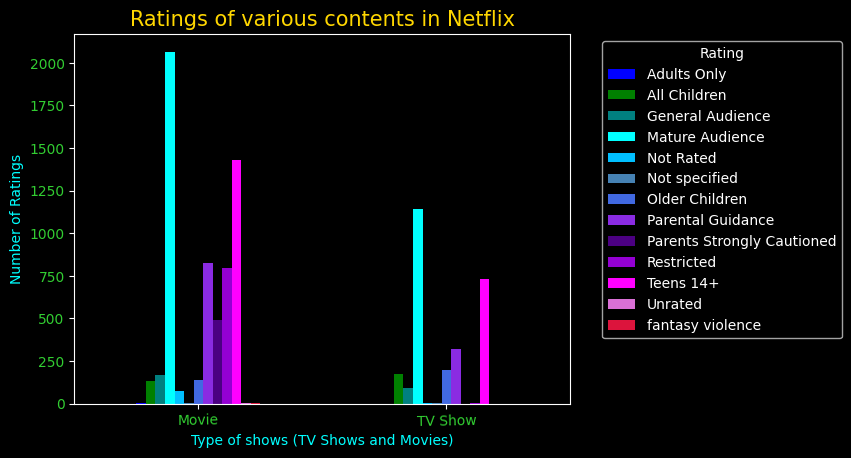

In [ ]:
data['rating'] = data['rating'].replace(replacements)
data['rating'].value_counts()

rating_content = data.groupby(['type', 'rating']).size().unstack(fill_value=0)
print(rating_content)

rating_content.plot(kind = 'bar', color = ['blue', 'green', 'teal', 'cyan', 'deepskyblue',
                                           'steelblue', 'royalblue', 'blueviolet', 'indigo',
                                            'darkviolet', 'fuchsia', 'orchid', 'crimson' ])
plt.title("Ratings of various contents in Netflix", color = 'gold', fontsize = 15)
plt.xlabel('Type of shows (TV Shows and Movies)', color = 'cyan', fontsize = 10)
plt.ylabel('Number of Ratings', color = 'cyan', fontsize = 10)
plt.xticks(color = 'limegreen', rotation = 1)
plt.yticks(color = 'limegreen')
plt.legend(title = 'Rating', bbox_to_anchor = (1.05, 1))
plt.show()


In [ ]:
'''# Plotting the data
rating_content.T.plot(kind='bar', figsize=(14, 8), color=['skyblue', 'lightgreen'])
plt.title('Distribution of Netflix Content by Type and Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.legend(title='Type')
plt.xticks(rotation=45)
plt.show()'''

"# Plotting the data\nrating_content.T.plot(kind='bar', figsize=(14, 8), color=['skyblue', 'lightgreen'])\nplt.title('Distribution of Netflix Content by Type and Rating')\nplt.xlabel('Rating')\nplt.ylabel('Number of Titles')\nplt.legend(title='Type')\nplt.xticks(rotation=45)\nplt.show()"

**Top 10 genre in movies in Netfix .**

                      Genre  Count
0      International Movies   2752
1                    Dramas   2427
2                  Comedies   1674
3    International TV Shows   1351
4             Documentaries    869
5        Action & Adventure    859
6                 TV Dramas    763
7        Independent Movies    756
8  Children & Family Movies    641
9           Romantic Movies    616


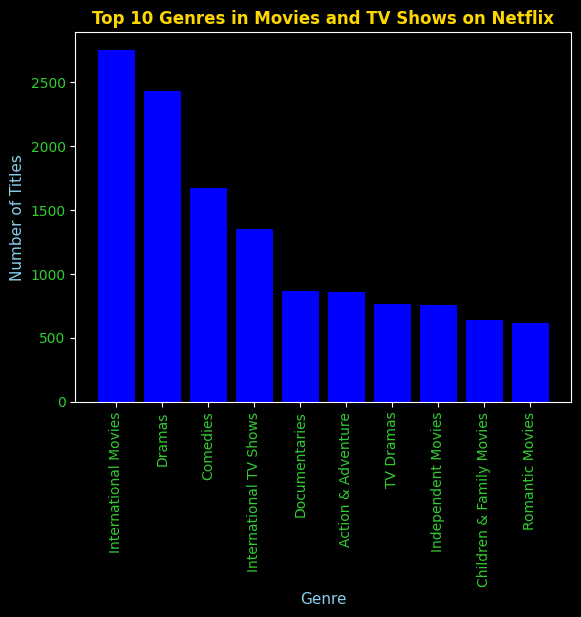

In [ ]:
# Filter the dataset for movies only
movies_data = data[(data['type'] == 'Movie') | (data['type'] == 'TV Show')]

# Split the 'listed_in' column into individual genres, explode the list into rows, and count the occurrences
top_10_genres = movies_data['listed_in'].str.split(', ').explode().value_counts().reset_index().head(10)
top_10_genres.columns = ['Genre', 'Count']
print(top_10_genres)

# plt.figure(figsize=(12, 8))
plt.bar(top_10_genres['Genre'], top_10_genres['Count'], color='blue')
plt.title('Top 10 Genres in Movies and TV Shows on Netflix', color = 'gold', fontweight="bold")
plt.xlabel('Genre', color = 'skyblue', fontsize = 11)
plt.xticks(color = 'limegreen')
plt.ylabel('Number of Titles', color = 'skyblue', fontsize = 11)
plt.yticks(color = 'limegreen')
plt.xticks(rotation=90)
plt.show()


**In which months most Movies TV Shows are added?**

In [ ]:
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')
data['months_added'] = data['date_added'].dt.month
data['months_added'] = data['months_added'].fillna(0).astype(int)

month_total = data['months_added'].value_counts().sort_index().reset_index()
month_total.columns = ['month_added', 'total_additions']

month_total = month_total[month_total['month_added'] != 0].sort_values(by='total_additions', ascending=False)
print(month_total)

    month_added  total_additions
7             7              819
12           12              797
9             9              765
4             4              759
10           10              755
8             8              749
3             3              734
1             1              727
6             6              724
11           11              697
5             5              626
2             2              557


   month_added  total_additions
0      January              727
1     February              557
2        March              734
3        April              759
4          May              626
5         June              724
6         July              819
7       August              749
8    September              765
9      October              755
10    November              697
11    December              797


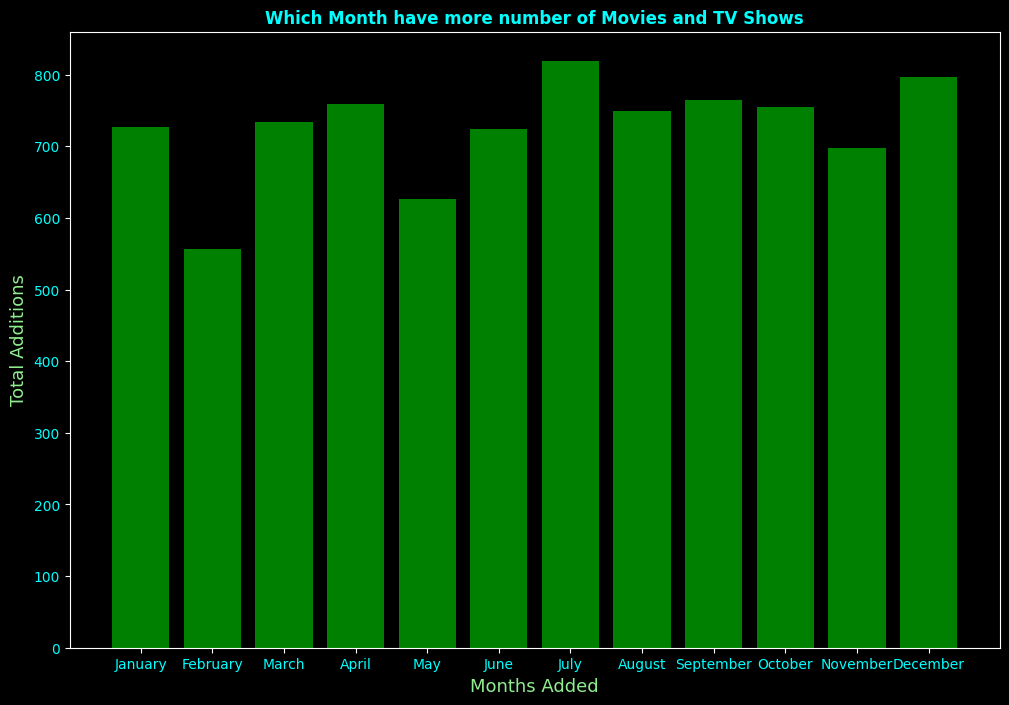

In [ ]:
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')
data['month_added'] = data['date_added'].dt.month
monthly_totals = data['month_added'].value_counts().sort_index().reset_index()
monthly_totals.columns = ['month_added', 'total_additions']

monthly_totals['month_added'] = monthly_totals['month_added'].apply(lambda x: calendar.month_name[int(x)] if pd.notnull(x) else 'Unknown')

# Sort by the total number of additions, excluding any placeholders if needed
# monthly_totals = monthly_totals.sort_values(by='total_additions', ascending=False)
print(monthly_totals)

plt.figure(figsize = (12,8))
plt.title('Which Month have more number of Movies and TV Shows', color = 'cyan', weight = 'bold')
plt.bar(monthly_totals['month_added'], monthly_totals['total_additions'], color = 'green')
plt.xlabel('Months Added', color = 'lightgreen', fontsize = 13)
plt.xticks(color = 'cyan')
plt.ylabel('Total Additions', color = 'lightgreen', fontsize = 13)
plt.yticks(color = 'cyan')
plt.show()

From this plot, we can see that the most titles were added in July, followed closely by December.